In [2]:
import pandas as pd
import pickle
import numpy as np

from sklearn.metrics import (accuracy_score, precision_score, confusion_matrix,
                            recall_score, f1_score, roc_curve, auc)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Insurance_dataset.csv')

df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [4]:
#檢查有無缺失或重複值
df.info()

df.isna().any()

df.loc[df.duplicated()]

dup_rows = df.duplicated().sum()
print(f'\n重複的行數: {dup_rows}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB

重複的行數: 0


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
#計算每個欄位的類別數量
for column in df.columns:
    unique_v = df[column].nunique()
    print(f'{column} 有 {unique_v} 種類別')

id 有 382154 種類別
Gender 有 2 種類別
Age 有 66 種類別
Driving_License 有 2 種類別
Region_Code 有 53 種類別
Previously_Insured 有 2 種類別
Vehicle_Age 有 3 種類別
Vehicle_Damage 有 2 種類別
Annual_Premium 有 48993 種類別
Policy_Sales_Channel 有 156 種類別
Vintage 有 290 種類別
Response 有 2 種類別


In [7]:
#顯示文字欄位的各類別名稱
print('\n性別', df['Gender'].value_counts())
print('\n裝置年紀', df['Vehicle_Age'].value_counts())
print('\n裝置損壞', df['Vehicle_Damage'].value_counts())
print('\n回應', df['Response'].value_counts())


性別 Gender
Male      205603
Female    176551
Name: count, dtype: int64

裝置年紀 Vehicle_Age
1-2 Year     200176
< 1 Year     166353
> 2 Years     15625
Name: count, dtype: int64

裝置損壞 Vehicle_Damage
No     198501
Yes    183653
Name: count, dtype: int64

回應 Response
0    319553
1     62601
Name: count, dtype: int64


In [8]:
#文字轉數值表示
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1}).astype('int')
df['Vehicle_Age'] = df['Vehicle_Age'].map({'1-2 Year':0, '< 1 Year':1, '> 2 Years':2}).astype('int')
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'No':0, 'Yes':1}).astype('int')

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [9]:
scale_standard = StandardScaler()
numeric_features = ['Annual_Premium', 'Vintage']
df[numeric_features] = scale_standard.fit_transform(df[numeric_features])

df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,-1.645878,152.0,-1.650319,0
1,17163,1,42,1,28.0,0,0,1,0.739424,26.0,-0.229169,0
2,32023,0,66,1,33.0,0,0,1,0.300660,124.0,1.180039,0
3,87447,0,22,1,33.0,0,1,0,-0.179718,152.0,-1.017369,0
4,501933,1,28,1,46.0,1,1,0,-0.098952,152.0,0.678457,0
5,295775,0,25,1,25.0,1,1,0,-0.161607,152.0,-1.566722,0
6,71711,1,51,1,8.0,0,0,1,-1.645878,26.0,0.654572,0
7,331781,1,38,1,28.0,1,0,0,-1.645878,26.0,-1.232333,0
8,290704,0,45,1,28.0,0,0,1,1.474760,124.0,1.287521,0
9,344792,1,42,1,28.0,0,0,1,-0.170575,122.0,0.750111,1


In [11]:
#製作訓練模型的特徵與標籤
X = df.drop(['id', 'Response'], axis=1)
y = df['Response']

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print(Counter(y_rus))

Counter({0: 62601, 1: 62601})


In [13]:
#模型1: Decision Tree

from sklearn import tree

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
depth = 21
depthvalues = [i for i in range(1, depth)]
leaf = 10
leafvalues = [i for i in range(1, leaf)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_depth = 0
relative_best_leaf = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for i in depthvalues:
        for j in leafvalues:
            clf = tree.DecisionTreeClassifier(random_state=42, max_depth=i, min_samples_leaf=j)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            test_acc = accuracy_score(y_test, y_pred_test)

            fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
            roc_auc = auc(fpr, tpr)

            if roc_auc > relative_best_roc_auc:
                relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                relative_best_test_score = test_acc
                relative_best_ratio = k
                relative_best_depth = i
                relative_best_leaf = j
                relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                relative_best_roc_auc = roc_auc
                best_fpr, best_tpr = fpr, tpr 
                best_cm = confusion_matrix(y_test, y_pred_test) 
                best_clf = clf

print("best ratio of testing data:", relative_best_ratio, 
        "\nbest depth:", relative_best_depth, 
        "\nbest min_sample_leaf:", relative_best_leaf,
        "\nTraining score:", relative_best_train_score, 
        "\nTesting score:", relative_best_test_score,      
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\nConfusion Matrix:\n", best_cm)     


with open('d2_best_decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 30 
best depth: 11 
best min_sample_leaf: 9 
Training score: 0.8420031720313552 
Testing score: 0.8296371236122574 
F1 score: 0.8284240801193259 
Recall: 0.8296371236122574 
Precision: 0.8397769637966541 
ROC AUC: 0.8850614136821033 
Confusion Matrix:
 [[14036  4814]
 [ 1585 17126]]


In [14]:
#模型2: KNN

from sklearn import neighbors

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
neighbor = 10
neighborvalues = [i for i in range(1, neighbor)]
p = 3
pvalues = [i for i in range(1, p)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_neighbor = 0
relative_best_p = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for i in neighborvalues:
        for j in pvalues:
            clf = neighbors.KNeighborsClassifier(n_neighbors=i, p=j)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            test_acc = accuracy_score(y_test, y_pred_test)

            fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
            roc_auc = auc(fpr, tpr)

            if roc_auc > relative_best_roc_auc:
                relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                relative_best_test_score = test_acc
                relative_best_ratio = k
                relative_best_neighbor = i
                relative_best_p = j
                relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                relative_best_roc_auc = roc_auc
                best_fpr, best_tpr = fpr, tpr
                best_cm = confusion_matrix(y_test, y_pred_test)
                best_clf = clf

print("best ratio of testing data:", relative_best_ratio, 
        "\nbest neighbors:", relative_best_neighbor, 
        "\nbest p:", relative_best_p,
        "\nTraining score:", relative_best_train_score, 
        "\nTesting score:", relative_best_test_score, 
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm) 

with open('d2_best_knn_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best neighbors: 9 
best p: 1 
Training score: 0.839981895794322 
Testing score: 0.8147112850411309 
F1 score: 0.8136729639041218 
Recall: 0.8147112850411309 
Precision: 0.8243198161209053 
ROC AUC: 0.8711584997716304 

confusion matrix:
 [[4684 1685]
 [ 635 5517]]


In [15]:
#模型3: RandomForest

from sklearn.ensemble import RandomForestClassifier

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 8
depthvalues = [i for i in range(1, depth)]
leaf = 5
leafvalues = [i for i in range(1, leaf)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_estimators = 0
relative_best_depth = 0
relative_best_leaf = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=71)
    for l in n_estimatorvalues:
        for i in depthvalues:
            for j in leafvalues:
                clf = RandomForestClassifier(random_state=71, n_estimators=l, max_depth=i, min_samples_leaf=j)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > relative_best_roc_auc:
                    relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    relative_best_test_score = test_acc
                    relative_best_ratio = k
                    relative_best_estimators = l
                    relative_best_depth = i
                    relative_best_leaf = j
                    relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    relative_best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", relative_best_ratio, 
        "\nbest no. of estimators:", relative_best_estimators, 
        "\nbest depth:", relative_best_depth, 
        "\nbest min_sample_leaf:", relative_best_leaf,
        "\nTraining score:", relative_best_train_score, 
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('d2_best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best no. of estimators: 100 
best depth: 7 
best min_sample_leaf: 3 
Training score: 0.8313646488760306 
Testing score: 0.8320421691558182 
F1 score: 0.8298206380285986 
Recall: 0.8320421691558182 
Precision: 0.8500936866482824 
ROC AUC: 0.8901613249890212 

confusion matrix:
 [[4490 1763]
 [ 340 5928]]


In [16]:
#模型4: XGBoost

from xgboost.sklearn import XGBClassifier

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 8
depthvalues = [i for i in range(1, depth)]
rate = 3
ratevalues = [i for i in range(1, rate)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_estimators = 0
relative_best_depth = 0
relative_best_rate = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for l in n_estimatorvalues:
        for i in depthvalues:
            for j in ratevalues:
                clf = XGBClassifier(random_state=42, n_estimators=l, max_depth=i, learning_rate=j)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > relative_best_roc_auc:
                    relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    relative_best_test_score = test_acc
                    relative_best_ratio = k
                    relative_best_estimators = l
                    relative_best_depth = i
                    relative_best_rate = j
                    relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    relative_best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest no. of estimators:", relative_best_estimators,
        "\nbest depth:", relative_best_depth,
        "\nbest learning_rate:", relative_best_rate,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('d2_best_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 20 
best no. of estimators: 100 
best depth: 2 
best learning_rate: 1 
Training score: 0.8397280378590469 
Testing score: 0.8357094365241005 
F1 score: 0.8346064543667611 
Recall: 0.8357094365241005 
Precision: 0.8459757025370953 
ROC AUC: 0.8950133721642721 

confusion matrix:
 [[ 9485  3126]
 [  988 11442]]


In [17]:
#模型5: LogisticRegression

from sklearn.linear_model import LogisticRegression

ratio = 100
ratio_values = [i for i in range(10, ratio, 10)]
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
class_weight_values = [None, 'balanced']
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

best_train_score = 0
best_test_score = 0
best_ratio = 0
best_C = 0
best_class_weight = ''
best_solver = ''
best_f1_score = 0
best_recall = 0
best_precision = 0
best_roc_auc = 0

for k in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for i in C_values:
        for j in class_weight_values:
            for r in solver_values:
                clf = LogisticRegression(C=i, class_weight=j, solver=r, max_iter=1000)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > best_roc_auc:
                    best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    best_test_score = test_acc
                    best_ratio = k
                    best_C = i
                    best_class_weight = j
                    best_solver = r
                    best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", best_ratio,
        "\nbest C:", best_C,
        "\nbest class weight:", best_class_weight,
        "\nbest solver:", best_solver,
        "\nTraining score:", best_train_score,
        "\nTesting score:", best_test_score,
        "\nF1 score:", best_f1_score,
        "\nRecall:", best_recall,
        "\nPrecision:", best_precision,
        "\nROC AUC:", best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('d2_best_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

c:\NTU_Python_Course\test1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\NTU_Python_Course\test1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\NTU_Python_Course\test1\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\NTU_Python_Course\test1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached 

best ratio of testing data: 90 
best C: 0.1 
best class weight: None 
best solver: liblinear 
Training score: 0.8118210862619808 
Testing score: 0.8147175236506274 
F1 score: 0.8091832373386998 
Recall: 0.8147175236506274 
Precision: 0.8557980292097587 
ROC AUC: 0.8549500770366629 

confusion matrix:
 [[36288 20014]
 [  864 55516]]


c:\NTU_Python_Course\test1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
#模型6: Gaussian Naive bayes

from sklearn.naive_bayes import GaussianNB

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    if roc_auc > relative_best_roc_auc:
        relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
        relative_best_test_score = test_acc
        relative_best_ratio = k
        relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
        relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
        relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
        relative_best_roc_auc = roc_auc
        best_fpr, best_tpr = fpr, tpr
        best_cm = confusion_matrix(y_test, y_pred_test)
        best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)


with open('d2_best_gaussian_nb_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 60 
Training score: 0.8139376996805112 
Testing score: 0.815087457735417 
F1 score: 0.8097577620276823 
Recall: 0.815087457735417 
Precision: 0.855714733264389 
ROC AUC: 0.8642359461228912 

confusion matrix:
 [[24378 13285]
 [  606 36853]]


In [23]:
#模型7: Multinomail Naive bayes

from sklearn.naive_bayes import MultinomialNB

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
fit_prior_values = [True, False]
class_prior_values = [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]

relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_alpha = 0
relative_best_fit_prior = True
relative_best_class_prior = None
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for i in alpha_values:
        for j in fit_prior_values:
            for r in class_prior_values:
                clf = MultinomialNB(alpha=i, fit_prior=j, class_prior=r)
                
                min_feature_value = np.min(X_train)
                if min_feature_value < 0:
                    shift_value = abs(min_feature_value)
                    X_train += shift_value
                    X_test += shift_value  
                
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > relative_best_roc_auc:
                    relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    relative_best_test_score = test_acc
                    relative_best_ratio = k
                    relative_best_alpha = i
                    relative_best_fit_prior = j
                    relative_best_class_prior = r
                    relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    relative_best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest alpha:", relative_best_alpha,
        "\nbest fit_prior:", relative_best_fit_prior,
        "\nbest class_prior:", relative_best_class_prior,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('d2_best_multinomial_nb_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 60 
best alpha: 0.001 
best fit_prior: True 
best class_prior: [0.5, 0.5] 
Training score: 0.5814097444089457 
Testing score: 0.5860466973722744 
F1 score: 0.5814772366029491 
Recall: 0.5860466973722744 
Precision: 0.5896317828768873 
ROC AUC: 0.6763821170320119 

confusion matrix:
 [[25988 11675]
 [19422 18037]]


In [14]:
#模型8 SVM

from sklearn import svm
from sklearn.model_selection import GridSearchCV

kernel_values = ["rbf", "poly"]
gamma_values = ["scale"]
param_grid = {'kernel': kernel_values, 'gamma': gamma_values,}

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)
svc = svm.SVC(random_state=42, probability=True)
grid = GridSearchCV(svc, param_grid, refit=True, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_test = best_model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
best_cm = confusion_matrix(y_test, y_pred_test)

print("Best parameters found:", grid.best_params_,
      "\nROC AUC:", roc_auc,
      "\n\nconfusion matrix:\n", best_cm)

with open('d2_best_svm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Best parameters found: {'gamma': 'scale', 'kernel': 'rbf'} 
ROC AUC: 0.8763535620264856 

confusion matrix:
 [[ 8945  3666]
 [  826 11604]]


In [ ]:
'''
用8個儲存的模型來預測原始資料集 並計算多個指標與視覺化 
'''

Model: xgboost
Accuracy: 0.7807925600674074
F1 Score: 0.8071905262948719
Recall: 0.7807925600674074
Precision: 0.8892399494290169
Roc auc: 0.8965345328627141


Model: decision_tree
Accuracy: 0.7751953400984943
F1 Score: 0.8025430797162647
Recall: 0.7751953400984943
Precision: 0.8881898602004631
Roc auc: 0.8888310602467173


Model: gaussian_nb
Accuracy: 0.7014004825279861
F1 Score: 0.7401691601941884
Recall: 0.7014004825279861
Precision: 0.890231619966301
Roc auc: 0.8641679309316136


Model: knn
Accuracy: 0.7655735645839112
F1 Score: 0.7944392342354226
Recall: 0.7655735645839112
Precision: 0.8848989315911904
Roc auc: 0.8878968786904761


Model: logistic_regression
Accuracy: 0.7015836547569828
F1 Score: 0.7403297554538788
Recall: 0.7015836547569828
Precision: 0.8901919437957234
Roc auc: 0.8552540793076676


Model: multinomial_nb
Accuracy: 0.670339705982405
F1 Score: 0.7057571120806294
Recall: 0.670339705982405
Precision: 0.7648053665855356
Roc auc: 0.6748824727241142


Model: random_fore

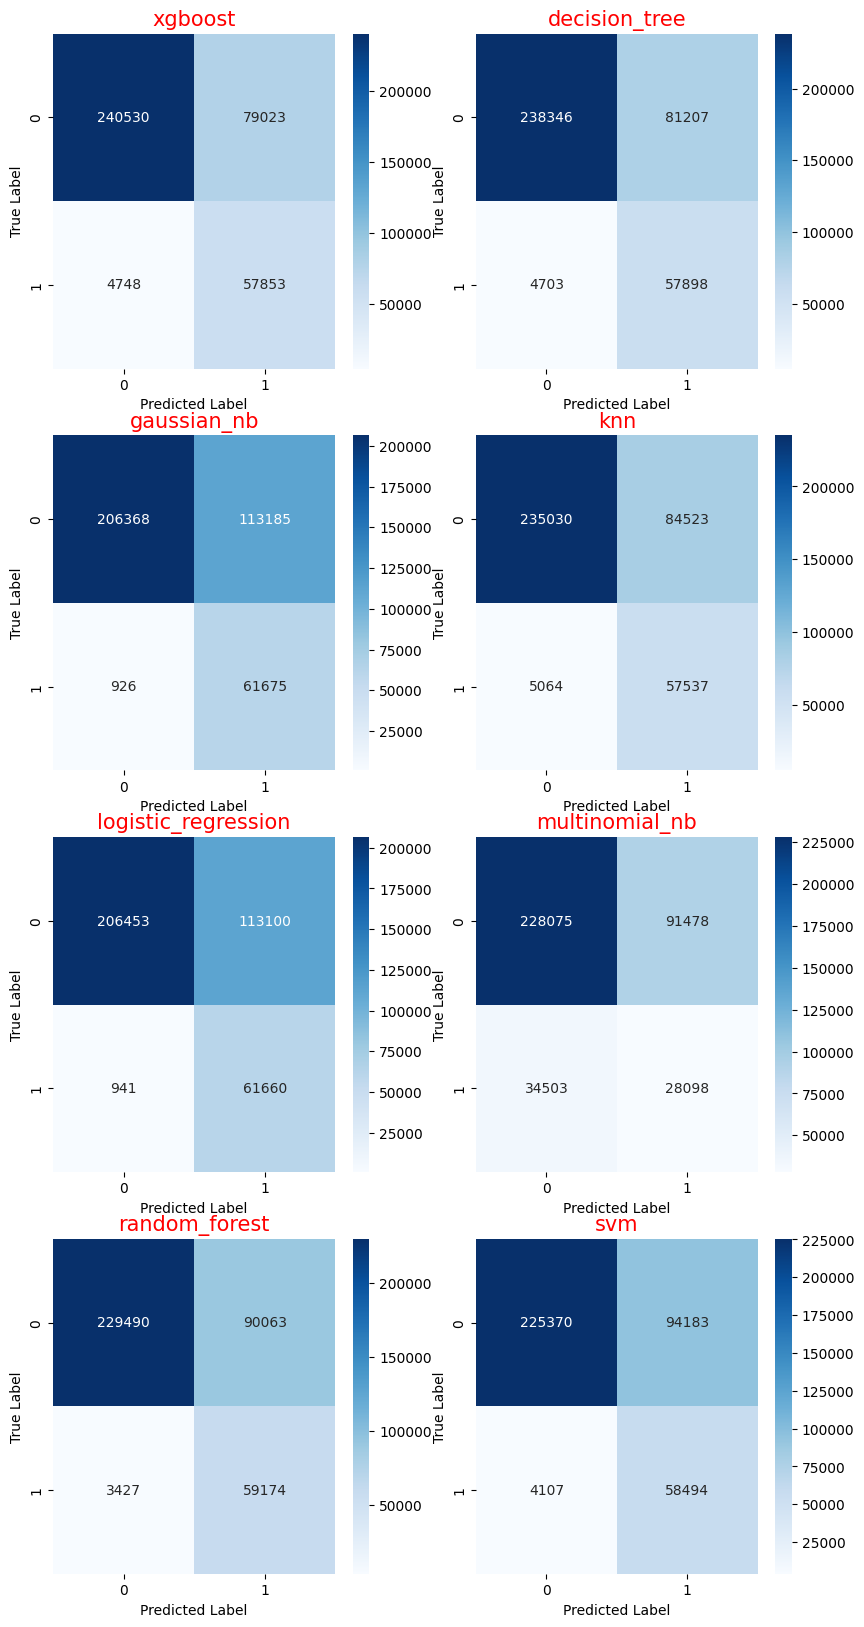

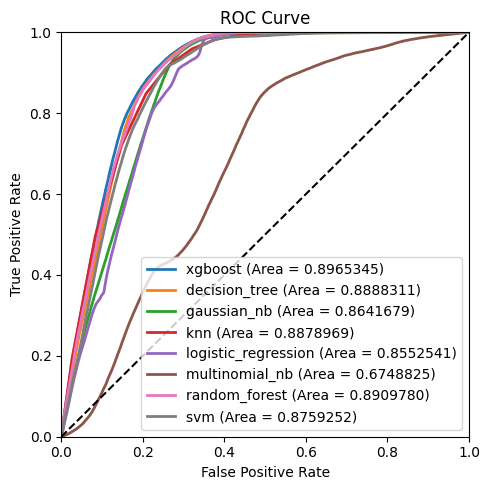

In [15]:
data = pd.read_csv('Insurance_dataset.csv')

X = df.drop(['id', 'Response'], axis=1)
y = df['Response']

model_files = [
    'd2_best_xgboost_model.pkl',
    'd2_best_decision_tree_model.pkl',
    'd2_best_gaussian_nb_model.pkl',
    'd2_best_knn_model.pkl',
    'd2_best_logistic_regression_model.pkl',
    'd2_best_multinomial_nb_model.pkl',
    'd2_best_random_forest_model.pkl',
    'd2_best_svm_model.pkl']

performance_data = []

fig, axes = plt.subplots(4, 2, figsize=(10, 20)) 
axes = axes.flatten()

roc_fig, roc_ax = plt.subplots(figsize=(5, 5))

for i, model_file in enumerate(model_files):
    with open(model_file, 'rb') as file:
        model = pickle.load(file)

    model_name = model_file.replace('d2_best_', '').replace('_model.pkl', '')

    predictions = model.predict(X)
    probas = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, probas)
    roc_auc = auc(fpr, tpr)

    roc_ax.plot(fpr, tpr, lw=2, label=f'{model_name} (Area = {roc_auc:.7f})')
    
    cm = confusion_matrix(y, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(model_name, fontsize=15, color='red')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    
    accuracy = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    recall = recall_score(y, predictions, average='weighted')
    precision = precision_score(y, predictions, average='weighted')
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Precision:", precision)
    print("Roc auc:", roc_auc)
    print("\n")
    
    performance_data.append({
    'Model': model_name,
    'Accuracy': accuracy,
    'F1 Score': f1,
    'Recall': recall,
    'Precision': precision,
    'ROC AUC': roc_auc})
    
performance_df = pd.DataFrame(performance_data)
performance_df.to_csv('all_model_metrics.csv', index=False)

roc_ax.plot([0, 1], [0, 1], color='black', linestyle='--')
roc_ax.set_xlim([0, 1])
roc_ax.set_ylim([0, 1])
roc_ax.set_xlabel('False Positive Rate')
roc_ax.set_ylabel('True Positive Rate')
roc_ax.set_title('ROC Curve')
roc_ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [48]:
performance_df

,Model,Accuracy,F1 Score,Recall,Precision,ROC AUC
0,xgboost,0.780793,0.807191,0.780793,0.889240,0.896535
1,decision_tree,0.775195,0.802543,0.775195,0.888190,0.888831
2,gaussian_nb,0.701400,0.740169,0.701400,0.890232,0.864168
3,knn,0.765574,0.794439,0.765574,0.884899,0.887897
4,logistic_regression,0.701584,0.740330,0.701584,0.890192,0.855254
5,multinomial_nb,0.670340,0.705757,0.670340,0.764805,0.674882
6,random_forest,0.755360,0.786204,0.755360,0.888839,0.890978
7,svm,0.742800,0.775510,0.742800,0.883983,0.875925


In [44]:
df_val = pd.read_csv('Insurance_validation.csv')

df_val

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,Female,34,1,39.0,1,1-2 Year,No,38244.0,124.0,146
1,286811,Female,55,1,28.0,0,> 2 Years,Yes,37577.0,122.0,109
2,117823,Male,39,1,28.0,1,1-2 Year,No,24578.0,26.0,63
3,213992,Male,28,1,50.0,1,1-2 Year,No,40507.0,8.0,129
4,324756,Female,24,1,10.0,0,< 1 Year,Yes,36783.0,152.0,201
...,...,...,...,...,...,...,...,...,...,...,...
78268,847,Male,43,1,39.0,0,1-2 Year,Yes,2630.0,124.0,26
78269,417524,Female,21,1,12.0,1,< 1 Year,No,32937.0,152.0,185
78270,188087,Male,48,1,29.0,1,1-2 Year,No,35247.0,124.0,101
78271,215680,Male,64,1,5.0,1,1-2 Year,No,25705.0,26.0,86


In [45]:
df_val['Gender'] = df_val['Gender'].map({'Female':0, 'Male':1}).astype('int')
df_val['Vehicle_Age'] = df_val['Vehicle_Age'].map({'1-2 Year':0, '< 1 Year':1, '> 2 Years':2}).astype('int')
df_val['Vehicle_Damage'] = df_val['Vehicle_Damage'].map({'No':0, 'Yes':1}).astype('int')

scale_standard = StandardScaler()
numeric_features = ['Annual_Premium', 'Vintage']
df_val[numeric_features] = scale_standard.fit_transform(df_val[numeric_features])

df_val.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,0,34,1,39.0,1,0,0,0.442204,124.0,-0.105745
1,286811,0,55,1,28.0,0,2,1,0.403070,122.0,-0.548986
2,117823,1,39,1,28.0,1,0,0,-0.359600,26.0,-1.100042
3,213992,1,28,1,50.0,1,0,0,0.574977,8.0,-0.309397
4,324756,0,24,1,10.0,0,1,1,0.356485,152.0,0.553126
5,425764,1,33,1,8.0,1,1,0,1.482800,152.0,1.427628
6,2934,1,50,1,18.0,0,0,1,0.316412,26.0,-0.752637
7,99098,1,55,1,47.0,0,0,1,-0.519244,26.0,-0.812535
8,120076,1,60,1,28.0,1,0,1,0.411812,122.0,0.708859
9,272687,1,44,1,35.0,1,0,0,-0.104144,26.0,-1.710995


In [49]:
import joblib

model = joblib.load('d2_best_xgboost_model.pkl')

validation_id = df_val['id']
validation_no_id = df_val.drop(columns=['id'])

predictions = model.predict(validation_no_id)

results = pd.DataFrame({'id': validation_id, 'Response': predictions})
results.to_csv('D2_val_predict.csv', index=False)

results.head(20)

,id,Response
0,57782,0
1,286811,1
2,117823,0
3,213992,0
4,324756,0
5,425764,0
6,2934,1
7,99098,1
8,120076,0
9,272687,0
